In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
import time
movies = pd.read_csv('movie_industry_clean.csv')

In [4]:
# data wrangling
def wrangling(df):
    df = df.drop('Unnamed: 0', axis=1)
    df = df.drop('index', axis=1)
    df.replace(' ', '_', regex=True, inplace = True)
    df.replace('-', '_', regex=True, inplace = True)
    return df

movies = wrangling(movies)

In [5]:
# grouping countries into continents
def continent(s):
    if s['country'] in ['United_States','Mexico', 'Canada','Jamaica']:
        return 'North_America'
    if s['country'] in ['United_Kingdom', 'France', 'Germany', 'Belgium','Spain', 'Norway', 'Iceland', 'West_Germany', 'Ireland', 'Italy', 'Finland', 'Czech_Republic', 'Switzerland', 'Sweden', 'Denmark', 'Netherlands','Federal_Republic_of_Yugoslavia','Yugoslavia', 'Hungary', 'Republic_of_Macedonia', 'Austria','Portugal','Malta']:
        return 'Europe'
    if s['country'] in ['Japan','China','South_Korea', 'Hong_Kong','India','United_Arab_Emirates','Taiwan','Lebanon','Indonesia', 'Iran','Israel','Russia','Thailand']:
        return 'Asia'
    if s['country'] in ['Australia','New_Zealand']:
        return 'Oceania'
    if s['country'] in ['South_Africa', 'Kenya']:
        return 'Africa'
    if s['country'] in ['Brazil', 'Argentina', 'Aruba', 'Chile', 'Panama','Colombia']:
        return 'South_America'
    else:
        return 'NA'

movies['continent'] = movies.apply(continent, axis=1)

In [6]:
# grouping years into decades
def decade(s):
    if s['year'].startswith('198'):
        return 'eighties'
    if s['year'].startswith('199'):
        return 'nineties'
    if s['year'].startswith('200'):
        return 'two_thousands'
    if s['year'].startswith('201'):
        return 'twenty_tens'
    if s['year'].startswith('202'):
        return 'twenty_twenties'
    else:
        return 'NA'

movies['year'] = movies['year'].astype(str)
movies['decade'] = movies.apply(decade, axis=1)
movies['year'] = movies['year'].astype(int)

In [7]:
# grouping continents into "western" into continents
def western(s):
    if s['continent'] in ['North_America','Europe', 'Oceania','South_America']:
        return 1
    if s['continent'] in ['Asia', 'Africa']:
        return 0
    else:
        return 'NA'

movies['western'] = movies.apply(western, axis=1)

In [8]:
# split into training & test
np.random.seed(2)
train = movies.sample(round(movies.shape[0]*0.8)) # 80%
test = movies.drop(train.index)

# Resetting the indices for both test and train
train = train.reset_index()
train = train.drop(['index'], axis=1)
test = test.reset_index()
test = test.drop(['index'], axis=1)

## MODELING WITH NO INTERACTIONS/TRANSFORMATIONS

In [9]:
# the start of a model by hand - NO INTERACTIONS/TRANSFORMATIONS with only original variables (no 'decade')
ols_object = smf.ols(formula = 'gross~budget+genre+rating+votes+continent+runtime+score+year', data = train)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     272.6
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:43:30   Log-Likelihood:                -86289.
No. Observations:                4337   AIC:                         1.726e+05
Df Residuals:                    4303   BIC:                         1.729e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -5.257e+08   3.63e+08     -1.448      0.148   -1.24e+09    1.86e+08
genre[T.Adventure]          6.217e+06   7.74e+06      0.803      0.422   -8.97e+06    2.14e+07
genre[T.Animation]          6.414e+07   1.01e+07      6.336      0.000    4.43e+07     8.4e+07
genre[T.Biography]         -1.005e+07   8.08e+06     -1.243      0.214   -2.59e+07    5.79e+06
genre[T.Comedy]             1.418e+07   4.74e+06      2.992      0.003    4.89e+06    2.35e+07
genre[T.Crime]             -2.856e+06   7.08e+06     -0.404      0.687   -1.67e+07     1.1e+07
genre[T.Drama]              1.931e+06   5.63e+06      0.343      0.731    -9.1e+06     1.3e+07
genre[T.Family]             4.694e+08   6.16e+07      7.621      0.000    3.49e+08     5.9e+08
genre[T.Fantasy]             2.11e+07   2.01e+07      1.050      0.294   -1.83e+07    6.05e+07
genre[T.Horror]             4.058e+07   8.46e+06      4.797      0.000     2.4e+07    5.72e+07
genre[T.Mystery]            1.333e+07   3.09e+07      0.431      0.666   -4.73e+07    7.39e+07
genre[T.Romance]           -1.125e+07   5.34e+07     -0.211      0.833   -1.16e+08    9.34e+07
genre[T.Sci_Fi]            -2.413e+07   4.35e+07     -0.554      0.579   -1.09e+08    6.12e+07
genre[T.Thriller]           3.862e+07   4.36e+07      0.887      0.375   -4.68e+07    1.24e+08
genre[T.Western]           -3.608e+06   1.06e+08     -0.034      0.973   -2.12e+08    2.05e+08
rating[T.G]                -7.332e+07   1.07e+08     -0.683      0.495   -2.84e+08    1.37e+08
rating[T.NC_17]            -7.814e+07   1.12e+08     -0.698      0.485   -2.98e+08    1.41e+08
rating[T.Not_Rated]        -5.937e+07   1.08e+08     -0.548      0.584   -2.72e+08    1.53e+08
rating[T.PG]               -5.853e+07   1.07e+08     -0.549      0.583   -2.68e+08    1.51e+08
rating[T.PG_13]            -6.984e+07   1.07e+08     -0.654      0.513   -2.79e+08    1.39e+08
rating[T.R]                -8.442e+07   1.07e+08     -0.791      0.429   -2.94e+08    1.25e+08
rating[T.TV_MA]            -9.248e+07   1.51e+08     -0.613      0.540   -3.88e+08    2.03e+08
rating[T.Unrated]          -5.807e+07   1.11e+08     -0.523      0.601   -2.76e+08     1.6e+08
rating[T.X]                -1.215e+08   1.51e+08     -0.805      0.421   -4.17e+08    1.74e+08
continent[T.Asia]           3.385e+07   6.25e+07      0.541      0.588   -8.87e+07    1.56e+08
continent[T.Europe]         1.099e+07   6.15e+07      0.179      0.858    -1.1e+08    1.32e+08
continent[T.North_America]  2.638e+07   6.15e+07      0.429      0.668   -9.41e+07    1.47e+08
continent[T.Oceania]        3.551e+07   6.32e+07      0.562      0.574   -8.83e+07    1.59e+08
continent[T.South_America]  2.036e+07   7.52e+07      0.271      0.787   -1.27e+08    1.68e+08
budget                         2.5002      

Text(0, 0.5, 'Residuals')

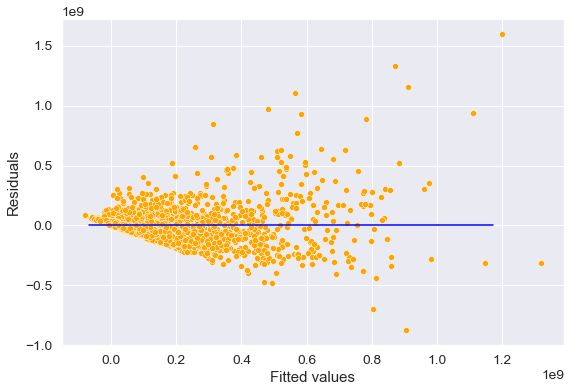

In [10]:
#Plotting residuals vs fitted values
pred_gross = model.predict(test)
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model.fittedvalues, y=model.resid,color = 'orange')
sns.lineplot(x = [pred_gross.min(),pred_gross.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

In [ ]:
# removing outliers/influential points

#Computing the leverage statistic for each observation
influence = model.get_influence()
leverage = influence.hat_matrix_diag

out = model.outlier_test()

#Average leverage of points
average_leverage = (model.df_model+1)/model.nobs
average_leverage

#We will remove all observations that have leverage higher than the threshold value.
high_leverage_threshold = 4*average_leverage

#Number of high leverage points in the dataset
print(np.sum(leverage>high_leverage_threshold))

#Dropping influential points from data
train_filtered = train.drop(np.intersect1d(np.where(np.abs(out.student_resid)>3)[0], (np.where(leverage>high_leverage_threshold)[0])))

train_filtered.shape

#Number of points removed as they were influential
print(train.shape[0]-train_filtered.shape[0])

/Users/aarti.pappu/opt/anaconda3/lib/python3.9/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [45]:
train_filtered

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,continent,decade,western
0,I_Now_Pronounce_You_Chuck_&_Larry,PG_13,Comedy,2007,"July_20,_2007_(United_States)",5.9,143000.0,Dennis_Dugan,Barry_Fanaro,Adam_Sandler,United_States,85000000.0,187134117.0,Universal_Pictures,115.0,North_America,two_thousands,1
1,Dead_Heat,R,Action,1988,"May_6,_1988_(United_States)",6.0,7200.0,Mark_Goldblatt,Terry_Black,Treat_Williams,United_States,5000000.0,3588626.0,New_World_Pictures,86.0,North_America,eighties,1
2,American_Wedding,R,Comedy,2003,"August_1,_2003_(United_States)",6.3,198000.0,Jesse_Dylan,Adam_Herz,Jason_Biggs,United_States,55000000.0,232722935.0,Universal_Pictures,96.0,North_America,two_thousands,1
3,You_Will_Meet_a_Tall_Dark_Stranger,R,Comedy,2010,"October_22,_2010_(United_States)",6.3,44000.0,Woody_Allen,Woody_Allen,Anthony_Hopkins,United_States,22000000.0,36015260.0,Mediapro,98.0,North_America,twenty_tens,1
4,Action_Jackson,R,Action,1988,"February_12,_1988_(United_States)",5.4,10000.0,Craig_R._Baxley,Robert_Reneau,Carl_Weathers,United_States,7000000.0,20256975.0,Lorimar_Film_Entertainment,96.0,North_America,eighties,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4332,Gods_of_Egypt,PG_13,Action,2016,"February_26,_2016_(United_States)",5.4,110000.0,Alex_Proyas,Matt_Sazama,Brenton_Thwaites,United_States,140000000.0,150680864.0,Pyramania,127.0,North_America,twenty_tens,1
4333,The_Hobbit:_The_Desolation_of_Smaug,PG_13,Adventure,2013,"December_13,_2013_(United_States)",7.8,615000.0,Peter_Jackson,Fran_Walsh,Ian_McKellen,New_Zealand,225000000.0,959007513.0,Metro_Goldwyn_Mayer_(MGM),161.0,Oceania,twenty_tens,1
4334,Leaving_Las_Vegas,R,Drama,1995,"February_9,_1996_(United_States)",7.5,117000.0,Mike_Figgis,John_O'Brien,Nicolas_Cage,United_States,3600000.0,32029928.0,Lumiere_Pictures,111.0,North_America,nineties,1
4335,J._Edgar,R,Biography,2011,"November_11,_2011_(United_States)",6.5,124000.0,Clint_Eastwood,Dustin_Lance_Black,Leonardo_DiCaprio,United_States,35000000.0,84920539.0,Imagine_Entertainment,137.0,North_America,twenty_tens,1


In [11]:
# LOG of the model
ols_object = smf.ols(formula = 'np.log(gross)~budget*genre+score*votes+rating+I(budget**2)+I(votes**2)+I(score*votes**2)', data = train)
model_log = ols_object.fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(gross)   R-squared:                     -19.061
Model:                            OLS   Adj. R-squared:                -19.149
Method:                 Least Squares   F-statistic:                    -215.9
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               1.00
Time:                        20:22:10   Log-Likelihood:                -15389.
No. Observations:                4337   AIC:                         3.082e+04
Df Residuals:                    4317   BIC:                         3.094e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  1.777e-09   1.14e-10     15.607      0.000    1.55e-09       2e-09
genre[T.Adventure]         3.482e-09   2.22e-10     15.667      0.000    3.05e-09    3.92e-09
genre[T.Animation]        -8.351e-11   5.36e-12    -15.574      0.000    -9.4e-11    -7.3e-11
genre[T.Biography]         5.369e-11   3.43e-12     15.644      0.000     4.7e-11    6.04e-11
genre[T.Comedy]            4.934e-10   3.16e-11     15.606      0.000    4.31e-10    5.55e-10
genre[T.Crime]             9.827e-11   6.29e-12     15.615      0.000    8.59e-11    1.11e-10
genre[T.Drama]             3.485e-10   2.23e-11     15.619      0.000    3.05e-10    3.92e-10
genre[T.Family]            1.271e-12    8.1e-14     15.696      0.000    1.11e-12    1.43e-12
genre[T.Fantasy]           4.356e-11    2.8e-12     15.584      0.000    3.81e-11     4.9e-11
genre[T.Horror]            4.176e-10   2.68e-11     15.586      0.000    3.65e-10     4.7e-10
genre[T.Mystery]          -5.184e-12   3.34e-13    -15.512      0.000   -5.84e-12   -4.53e-12
genre[T.Romance]          -8.096e-13   5.45e-14    -14.864      0.000   -9.16e-13   -7.03e-13
genre[T.Sci_Fi]            1.916e-12   1.23e-13     15.591      0.000    1.68e-12    2.16e-12
genre[T.Thriller]          1.667e-12   1.06e-13     15.749      0.000    1.46e-12    1.87e-12
genre[T.Western]           8.617e-14   6.97e-14      1.237      0.216   -5.04e-14    2.23e-13
rating[T.G]               -8.747e-11   5.62e-12    -15.572      0.000   -9.85e-11   -7.65e-11
rating[T.NC_17]            1.942e-11   1.25e-12     15.593      0.000     1.7e-11    2.19e-11
rating[T.Not_Rated]        2.101e-11   1.35e-12     15.614      0.000    1.84e-11    2.36e-11
rating[T.PG]              -2.481e-10   1.59e-11    -15.565      0.000   -2.79e-10   -2.17e-10
rating[T.PG_13]            8.882e-10    5.7e-11     15.584      0.000    7.77e-10       1e-09
rating[T.R]                1.182e-09   7.57e-11     15.613      0.000    1.03e-09    1.33e-09
rating[T.TV_MA]            1.653e-13   1.04e-14     15.911      0.000    1.45e-13    1.86e-13
rating[T.Unrated]          3.712e-12   2.38e-13     15.605      0.000    3.25e-12    4.18e-12
rating[T.X]               -1.677e-12   1.08e-13    -15.556      0.000   -1.89e-12   -1.47e-12
budget                     2.784e-07   8.79e-09     31.667      0.000    2.61e-07    2.96e-07
budget:genre[T.Adventure]  1.793e-09   8.58e-09      0.209      0.834    -1.5e-08    1.86e-08
budget:genre[T.Animation] -1.472e-08   7.09e-09     -2.075      0.038   -2.86e-08   -8.12e-10
budget:genre[T.Biography]  5.492e-08   1.68e-08      3.275      0.001     2.2e-08    8.78e-08
budget:genre[T.Comedy]     8.358e-08    9.1e-09      9.183      0.000    6.57e-08    1.01e-07
budget:genre[T.Crime]      5.979e-08   1.64e-08      3.650      0.000    2.

Text(0, 0.5, 'Residuals')

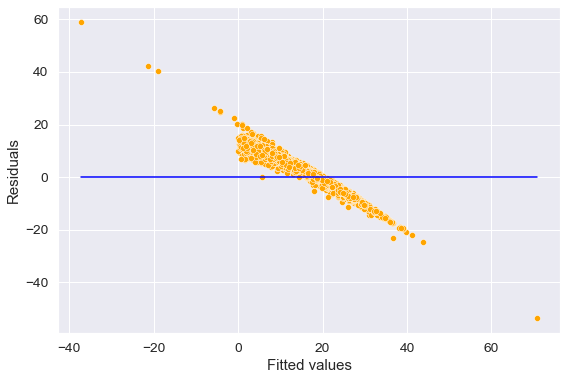

In [12]:
# log model
sns.scatterplot(x = (model_log.fittedvalues), y=(model_log.resid),color = 'orange')
sns.lineplot(x = [model_log.fittedvalues.min(),model_log.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

In [13]:
# SQUARE ROOT of the model
ols_object = smf.ols(formula = 'np.sqrt(gross)~budget*genre+score*votes+rating+I(budget**2)+I(votes**2)+I(score*votes**2)', data = train)
model_log = ols_object.fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.sqrt(gross)   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     649.8
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:22:11   Log-Likelihood:                -41271.
No. Observations:                4337   AIC:                         8.258e+04
Df Residuals:                    4317   BIC:                         8.271e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  1.248e-06   4.45e-08     28.058      0.000    1.16e-06    1.34e-06
genre[T.Adventure]         2.441e-06   8.68e-08     28.122      0.000    2.27e-06    2.61e-06
genre[T.Animation]        -5.868e-08   2.09e-09    -28.014      0.000   -6.28e-08   -5.46e-08
genre[T.Biography]         3.768e-08   1.34e-09     28.106      0.000    3.51e-08    4.03e-08
genre[T.Comedy]            3.465e-07   1.24e-08     28.057      0.000    3.22e-07    3.71e-07
genre[T.Crime]               6.9e-08   2.46e-09     28.069      0.000    6.42e-08    7.38e-08
genre[T.Drama]             2.447e-07   8.72e-09     28.075      0.000    2.28e-07    2.62e-07
genre[T.Family]            8.921e-10   3.16e-11     28.200      0.000     8.3e-10    9.54e-10
genre[T.Fantasy]            3.06e-08   1.09e-09     28.027      0.000    2.85e-08    3.27e-08
genre[T.Horror]            2.933e-07   1.05e-08     28.031      0.000    2.73e-07    3.14e-07
genre[T.Mystery]          -3.647e-09   1.31e-10    -27.935      0.000    -3.9e-09   -3.39e-09
genre[T.Romance]          -5.844e-10   2.13e-11    -27.468      0.000   -6.26e-10   -5.43e-10
genre[T.Sci_Fi]            1.345e-09    4.8e-11     28.010      0.000    1.25e-09    1.44e-09
genre[T.Thriller]          1.157e-09   4.13e-11     27.985      0.000    1.08e-09    1.24e-09
genre[T.Western]          -3.604e-12   2.72e-11     -0.132      0.895   -5.69e-11    4.97e-11
rating[T.G]               -6.146e-08   2.19e-09    -28.012      0.000   -6.58e-08   -5.72e-08
rating[T.NC_17]            1.364e-08   4.87e-10     28.041      0.000    1.27e-08    1.46e-08
rating[T.Not_Rated]        1.475e-08   5.26e-10     28.068      0.000    1.37e-08    1.58e-08
rating[T.PG]              -1.744e-07   6.23e-09    -28.012      0.000   -1.87e-07   -1.62e-07
rating[T.PG_13]             6.24e-07   2.23e-08     28.029      0.000     5.8e-07    6.68e-07
rating[T.R]                8.298e-07   2.96e-08     28.067      0.000    7.72e-07    8.88e-07
rating[T.TV_MA]            1.155e-10   4.06e-12     28.456      0.000    1.08e-10    1.23e-10
rating[T.Unrated]          2.607e-09   9.29e-11     28.056      0.000    2.42e-09    2.79e-09
rating[T.X]               -1.179e-09   4.21e-11    -27.993      0.000   -1.26e-09    -1.1e-09
budget                     9.753e-05   3.43e-06     28.396      0.000    9.08e-05       0.000
budget:genre[T.Adventure]  1.521e-05   3.35e-06      4.537      0.000    8.64e-06    2.18e-05
budget:genre[T.Animation]  3.741e-05   2.77e-06     13.500      0.000     3.2e-05    4.28e-05
budget:genre[T.Biography] -3.525e-06   6.55e-06     -0.538      0.591   -1.64e-05    9.32e-06
budget:genre[T.Comedy]     2.389e-05   3.56e-06      6.720      0.000    1.69e-05    3.09e-05
budget:genre[T.Crime]     -5.961e-06    6.4e-06     -0.932      0.352   -1.

## FORWARD VARIABLE SELECTION

In [14]:
def dummies_for_categorical_variables(df):
    rating_dummy = pd.get_dummies(df['rating'])
    df = pd.concat([df, rating_dummy], axis=1)
    df = df.drop('rating', axis=1)
    genre_dummy = pd.get_dummies(df['genre'])
    df = pd.concat([df, genre_dummy], axis=1)
    df = df.drop('genre', axis=1)
    continent_dummy = pd.get_dummies(df['continent'])
    df = pd.concat([df, continent_dummy], axis=1)
    df = df.drop('continent', axis=1)
    decade_dummy = pd.get_dummies(df['decade'])
    df = pd.concat([df, decade_dummy], axis=1)
    df = df.drop('decade', axis=1)
    return df

train_variable_selection = dummies_for_categorical_variables(train_filtered)
test = dummies_for_categorical_variables(test)

In [ ]:
train_filtered

In [15]:
#Creating a set of predictors from which we need to find the best subset of predictors - removing 1 dummy variable
X = train_variable_selection[['year','score','votes','budget','runtime','North_America', 'Europe', 'Asia', 'Oceania',
       'South_America','Comedy', 'Action', 'Drama', 'Biography', 'Horror', 'Adventure',
       'Crime', 'Animation', 'Fantasy', 'Thriller', 'Mystery', 'Sci_Fi',
       'Family', 'Romance','PG_13', 'R', 'PG', 'Not_Rated', 'G', 'Unrated', 'X', 'NC_17',
       'Approved','two_thousands','twenty_tens','twenty_twenties','eighties']]

In [16]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = smf.ols('gross~' + '+'.join(predictor_subset),data = train_variable_selection).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}

In [17]:
#Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [18]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')

In [19]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [20]:
def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [113]:
models_best = forward_selection()

Processed  41 models on 1 predictors in 0.29761195182800293 seconds.
Processed  40 models on 2 predictors in 0.3213996887207031 seconds.
Processed  39 models on 3 predictors in 0.3746628761291504 seconds.
Processed  38 models on 4 predictors in 0.4273238182067871 seconds.
Processed  37 models on 5 predictors in 0.4526090621948242 seconds.
Processed  36 models on 6 predictors in 0.4804971218109131 seconds.
Processed  35 models on 7 predictors in 0.5638198852539062 seconds.
Processed  34 models on 8 predictors in 0.6791870594024658 seconds.
Processed  33 models on 9 predictors in 0.5786359310150146 seconds.
Processed  32 models on 10 predictors in 0.6016991138458252 seconds.
Processed  31 models on 11 predictors in 0.6191561222076416 seconds.
Processed  30 models on 12 predictors in 1.6688499450683594 seconds.
Processed  29 models on 13 predictors in 1.1071081161499023 seconds.
Processed  28 models on 14 predictors in 1.30787992477417 seconds.
Processed  27 models on 15 predictors in 0.9

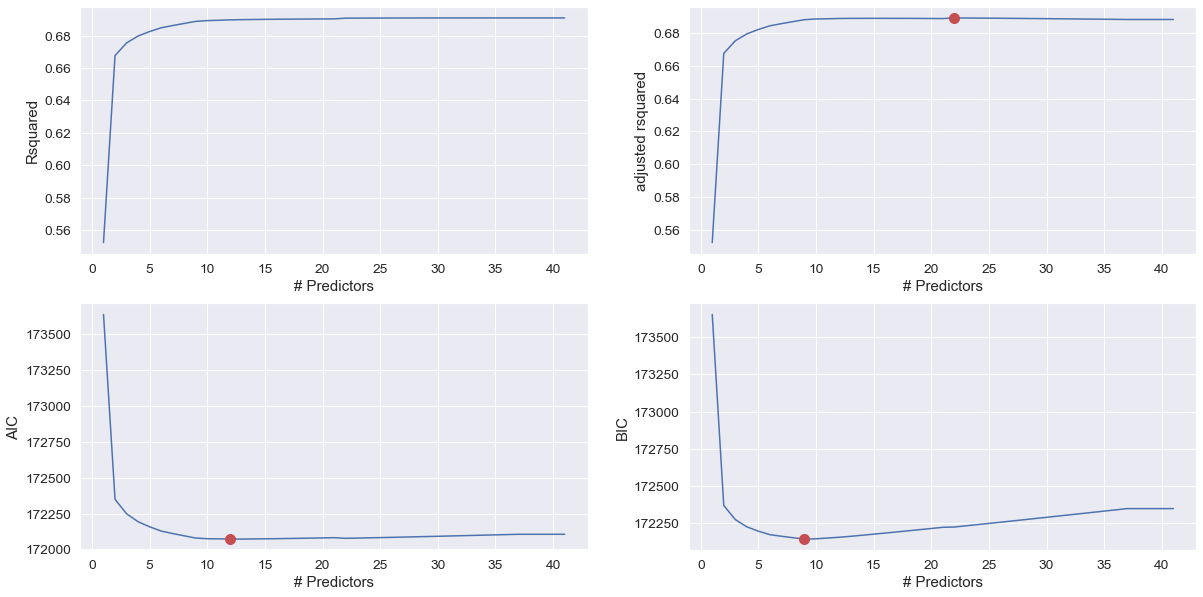

In [114]:
best_sub_plots()

In [115]:
best_fwd_reg_model1 = models_best['model'][9]
best_fwd_reg_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     1063.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:48:43   Log-Likelihood:                -86030.
No. Observations:                4330   AIC:                         1.721e+05
Df Residuals:                    4320   BIC:                         1.721e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.924e+07   3.76e+06     -5.114      0.000   -2.66e+07   -1.19e+07
budget            2.4085      0.046     52.153      0.000       2.318       2.499
votes           422.6507     10.382     40.709      0.000     402.296     443.005
Animation      7.469e+07   7.48e+06      9.979      0.000       6e+07    8.94e+07
two_thousands -3.339e+07   3.71e+06     -9.008      0.000   -4.07e+07   -2.61e+07
Family         6.258e+08   1.03e+08      6.068      0.000    4.24e+08    8.28e+08
R             -1.778e+07   3.39e+06     -5.247      0.000   -2.44e+07   -1.11e+07
Horror         3.634e+07   7.62e+06      4.766      0.000    2.14e+07    5.13e+07
Comedy         1.626e+07   3.67e+06      4.431      0.000    9.06e+06    2.35e+07
nineties      -1.648e+07   3.93e+06     -4.190      0.000   -2.42e+07   -8.77e+06
==============================================================================
Omnibus:                     3493.932   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           249092.261
Skew:                           3.336   Prob(JB):                         0.00
Kurtosis:                      39.553   Cond. No.                     3.61e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## BACKWARDS VARIABLE SELECTION

In [117]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [118]:
def backward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"], index = range(1,len(X.columns)))

    tic = time.time()
    predictors = X.columns
    models_best.loc[len(predictors)] = processSubset(predictors)
    
    while(len(predictors) > 1):  
        models_best.loc[len(predictors)-1] = backward(predictors)
        predictors = models_best.loc[len(predictors)-1]["model"].params.index[1:]

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [119]:
models_best = backward_selection()

Processed  41 models on 40 predictors in 3.5497639179229736 seconds.
Processed  40 models on 39 predictors in 4.161344051361084 seconds.
Processed  39 models on 38 predictors in 4.133117198944092 seconds.
Processed  38 models on 37 predictors in 4.492745399475098 seconds.
Processed  37 models on 36 predictors in 3.4547770023345947 seconds.
Processed  36 models on 35 predictors in 4.487828016281128 seconds.
Processed  35 models on 34 predictors in 7.790445804595947 seconds.
Processed  34 models on 33 predictors in 3.586599111557007 seconds.
Processed  33 models on 32 predictors in 2.0198190212249756 seconds.
Processed  32 models on 31 predictors in 2.134326934814453 seconds.
Processed  31 models on 30 predictors in 2.223641872406006 seconds.
Processed  30 models on 29 predictors in 2.998016834259033 seconds.
Processed  29 models on 28 predictors in 2.070889949798584 seconds.
Processed  28 models on 27 predictors in 1.5355491638183594 seconds.
Processed  27 models on 26 predictors in 1.8

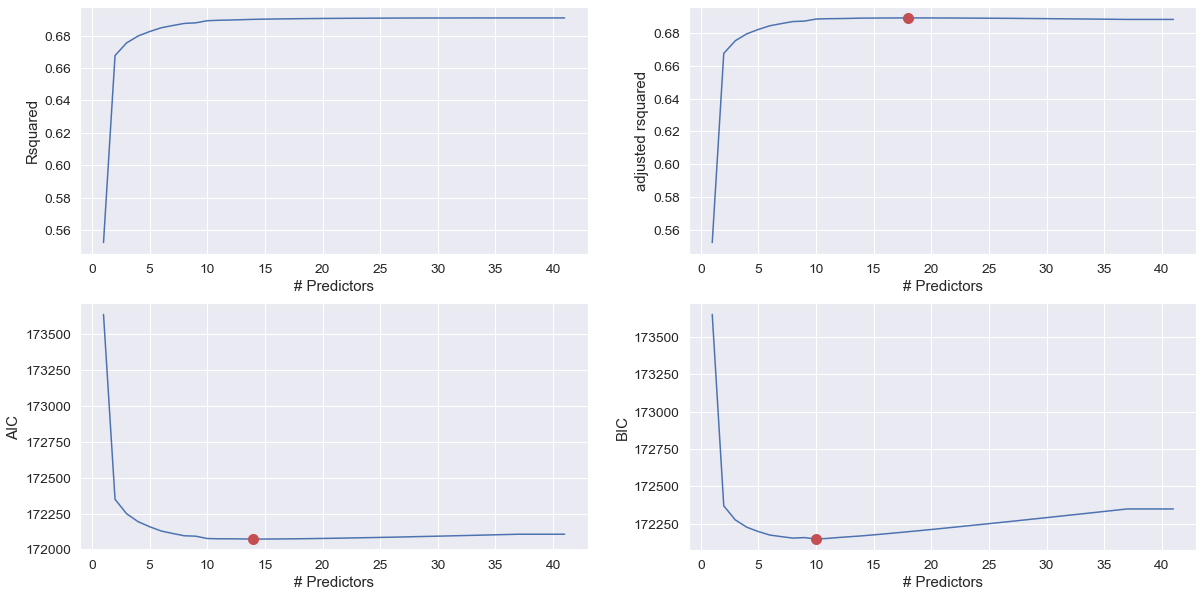

In [120]:
best_sub_plots()

In [121]:
best_bwd_reg_model1 = models_best['model'][10]
best_bwd_reg_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     958.0
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:52:40   Log-Likelihood:                -86027.
No. Observations:                4330   AIC:                         1.721e+05
Df Residuals:                    4319   BIC:                         1.721e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.839e+09   4.24e+08     -4.338      0.000   -2.67e+09   -1.01e+09
year           9.038e+05   2.12e+05      4.270      0.000    4.89e+05    1.32e+06
votes           422.8795     10.387     40.711      0.000     402.515     443.244
budget            2.4032      0.048     50.531      0.000       2.310       2.496
Comedy         1.619e+07   3.67e+06      4.417      0.000    9.01e+06    2.34e+07
Horror         3.607e+07   7.62e+06      4.732      0.000    2.11e+07     5.1e+07
Animation      7.455e+07   7.48e+06      9.962      0.000    5.99e+07    8.92e+07
Family         6.275e+08   1.03e+08      6.085      0.000    4.25e+08     8.3e+08
R             -1.783e+07   3.39e+06     -5.259      0.000   -2.45e+07   -1.12e+07
two_thousands -2.474e+07   3.58e+06     -6.909      0.000   -3.18e+07   -1.77e+07
eighties       2.698e+07   6.01e+06      4.487      0.000    1.52e+07    3.88e+07
==============================================================================
Omnibus:                     3487.490   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           247689.197
Skew:                           3.327   Prob(JB):                         0.00
Kurtosis:                      39.450   Cond. No.                     1.49e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## MODELING WITH INTERACTIONS/TRANSFORMATIONS

In [56]:
# no transformations of the response variable
ols_object = smf.ols(formula = 'gross~budget*genre+score*votes+rating+I(budget**2)+I(votes**2)+I(score*votes**2)', data = train_filtered)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     608.4
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:46:10   Log-Likelihood:                -85735.
No. Observations:                4330   AIC:                         1.715e+05
Df Residuals:                    4310   BIC:                         1.716e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.0215      0.002     11.237      0.000       0.018       0.025
genre[T.Adventure]            0.0451      0.004     11.257      0.000       0.037       0.053
genre[T.Animation]           -0.0010   8.76e-05    -11.228      0.000      -0.001      -0.001
genre[T.Biography]            0.0008   6.72e-05     11.242      0.000       0.001       0.001
genre[T.Comedy]               0.0057      0.001     11.235      0.000       0.005       0.007
genre[T.Crime]                0.0013      0.000     11.236      0.000       0.001       0.002
genre[T.Drama]                0.0039      0.000     11.238      0.000       0.003       0.005
genre[T.Family]            5.769e-06   8.75e-07      6.590      0.000    4.05e-06    7.48e-06
genre[T.Fantasy]              0.0005   4.66e-05     11.228      0.000       0.000       0.001
genre[T.Horror]               0.0048      0.000     11.229      0.000       0.004       0.006
genre[T.Mystery]          -1.695e-05   1.51e-06    -11.242      0.000   -1.99e-05    -1.4e-05
genre[T.Romance]          -9.781e-06   8.78e-07    -11.142      0.000   -1.15e-05   -8.06e-06
genre[T.Sci_Fi]             3.96e-06   3.56e-07     11.134      0.000    3.26e-06    4.66e-06
genre[T.Thriller]          2.083e-05   1.86e-06     11.222      0.000    1.72e-05    2.45e-05
genre[T.Western]           1.105e-07   7.96e-07      0.139      0.890   -1.45e-06    1.67e-06
rating[T.G]                  -0.0009   8.08e-05    -11.226      0.000      -0.001      -0.001
rating[T.NC_17]               0.0002   2.08e-05     11.231      0.000       0.000       0.000
rating[T.Not_Rated]           0.0003   2.35e-05     11.236      0.000       0.000       0.000
rating[T.PG]                 -0.0024      0.000    -11.198      0.000      -0.003      -0.002
rating[T.PG_13]               0.0101      0.001     11.228      0.000       0.008       0.012
rating[T.R]                   0.0141      0.001     11.236      0.000       0.012       0.017
rating[T.TV_MA]            2.538e-06   2.25e-07     11.295      0.000     2.1e-06    2.98e-06
rating[T.Unrated]          4.757e-05   4.23e-06     11.234      0.000    3.93e-05    5.59e-05
rating[T.X]               -1.801e-05    1.6e-06    -11.221      0.000   -2.12e-05   -1.49e-05
budget                        0.0197      0.103      0.191      0.848      -0.182       0.222
budget:genre[T.Adventure]     0.4674      0.098      4.764      0.000       0.275       0.660
budget:genre[T.Animation]     1.2955      0.081     15.961      0.000       1.136       1.455
budget:genre[T.Biography]    -0.3839      0.192     -2.000      0.046      -0.760      -0.008
budget:genre[T.Comedy]        0.2394      0.104      2.299      0.022       0.035       0.444
budget:genre[T.Crime]        -0.3328      0.187     -1.776      0.076      

In [144]:
# RSE on training data
print(np.sqrt(model.mse_resid))
# RMSE
pred_gross = model.predict(test)
print(np.sqrt(((test.gross - pred_gross)**2).mean()))

96372183.88169003
116060861.32736677


Text(0, 0.5, 'Residuals')

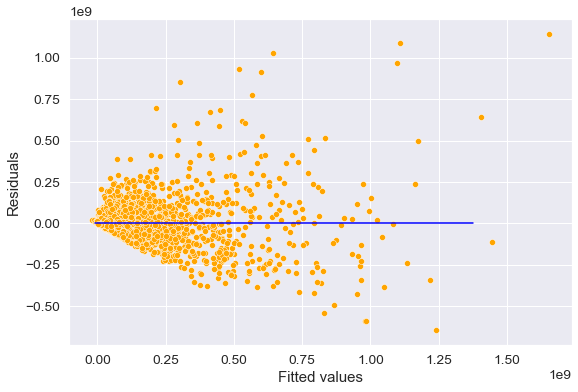

In [135]:
#Plotting residuals vs fitted values
pred_gross = model.predict(test)
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model.fittedvalues, y=model.resid,color = 'orange')
sns.lineplot(x = [pred_gross.min(),pred_gross.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

In [14]:
# sqrt of the response variable
ols_object = smf.ols(formula = 'np.sqrt(gross)~budget*genre+score*votes+rating+decade*genre+I(budget**2)+I(votes**2)+I(score*votes**2)', data = train)
model_sqrt = ols_object.fit()
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.sqrt(gross)   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     649.8
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:07:30   Log-Likelihood:                -41271.
No. Observations:                4337   AIC:                         8.258e+04
Df Residuals:                    4317   BIC:                         8.271e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                     1.248e-06   4.45e-08     28.058      0.000    1.16e-06    1.34e-06
genre[T.Adventure]                            1.103e-06   3.94e-08     27.972      0.000    1.03e-06    1.18e-06
genre[T.Animation]                           -5.739e-08   2.05e-09    -28.014      0.000   -6.14e-08   -5.34e-08
genre[T.Biography]                            3.751e-08   1.33e-09     28.107      0.000    3.49e-08    4.01e-08
genre[T.Comedy]                               3.465e-07   1.24e-08     28.057      0.000    3.22e-07    3.71e-07
genre[T.Crime]                                  6.9e-08   2.46e-09     28.069      0.000    6.42e-08    7.38e-08
genre[T.Drama]                                2.447e-07   8.72e-09     28.075      0.000    2.28e-07    2.62e-07
genre[T.Family]                               8.935e-10   3.17e-11     28.200      0.000    8.31e-10    9.56e-10
genre[T.Fantasy]                               3.06e-08   1.09e-09     28.027      0.000    2.85e-08    3.27e-08
genre[T.Horror]                               2.933e-07   1.05e-08     28.031      0.000    2.73e-07    3.14e-07
genre[T.Mystery]                             -3.648e-09   1.31e-10    -27.935      0.000    -3.9e-09   -3.39e-09
genre[T.Romance]                             -5.843e-10   2.13e-11    -27.467      0.000   -6.26e-10   -5.43e-10
genre[T.Sci_Fi]                               1.346e-09   4.81e-11     28.010      0.000    1.25e-09    1.44e-09
genre[T.Thriller]                             1.159e-09   4.14e-11     27.986      0.000    1.08e-09    1.24e-09
genre[T.Western]                              5.608e-12   2.72e-11      0.206      0.837   -4.77e-11     5.9e-11
rating[T.G]                                  -6.123e-08   2.19e-09    -28.012      0.000   -6.55e-08   -5.69e-08
rating[T.NC_17]                                1.37e-08   4.88e-10     28.041      0.000    1.27e-08    1.47e-08
rating[T.Not_Rated]                           1.475e-08   5.26e-10     28.068      0.000    1.37e-08    1.58e-08
rating[T.PG]                                 -1.744e-07   6.23e-09    -28.012      0.000   -1.87e-07   -1.62e-07
rating[T.PG_13]                                6.24e-07   2.23e-08     28.029      0.000     5.8e-07    6.68e-07
rating[T.R]                                   8.298e-07   2.96e-08     28.067      0.000    7.72e-07    8.88e-07
rating[T.TV_MA]                               1.155e-10   4.06e-12     28.456      0.000    1.08e-10    1.23e-10
rating[T.Unrated]                             2.607e-09   9.29e-11     28.056      0.000    2.42e-09    2.79e-09
rating[T.X]                                  -1.179e-09   4.21e-11    -27.993      0.000   -1.26e-09    -1.1e-09
decade[T.nineties]              

Text(0, 0.5, 'Residuals')

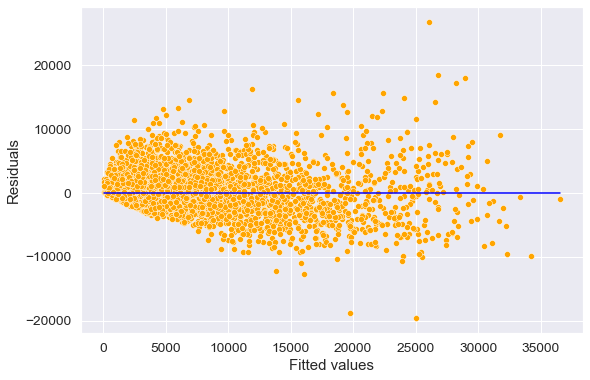

In [11]:
# sqrt model
sns.scatterplot(x = (model_sqrt.fittedvalues), y=(model_sqrt.resid),color = 'orange')
sns.lineplot(x = [model_sqrt.fittedvalues.min(),model_sqrt.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

In [61]:
# RSE on training data
print(np.sqrt(model_sqrt.mse_resid))
# RMSE
pred_sqrt_gross = model_sqrt.predict(test)
print(np.sqrt(((np.sqrt(test.gross) - (pred_sqrt_gross))**2).mean()))

3292.1776425875646
3428.072876924353


In [12]:
## NOT SQUARE ROOTED

# RSE on training data
print(model_sqrt.mse_resid)
# RMSE
pred_sqrt_gross = model_sqrt.predict(test)
print(((np.sqrt(test.gross) - (pred_sqrt_gross))**2).mean())

10838433.632068401
11751683.651423676


In [54]:
# Confirming lack of missing values
model_sqrt.predict(test).isnull().sum()

0

In [138]:
# log of the model
ols_object = smf.ols(formula = 'np.log(gross)~budget*genre+score*votes+rating+I(budget**2)+I(votes**2)+I(score*votes**2)', data = train)
model_log = ols_object.fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(gross)   R-squared:                     -19.061
Model:                            OLS   Adj. R-squared:                -19.149
Method:                 Least Squares   F-statistic:                    -215.9
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               1.00
Time:                        20:00:52   Log-Likelihood:                -15389.
No. Observations:                4337   AIC:                         3.082e+04
Df Residuals:                    4317   BIC:                         3.094e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Text(0, 0.5, 'Residuals')

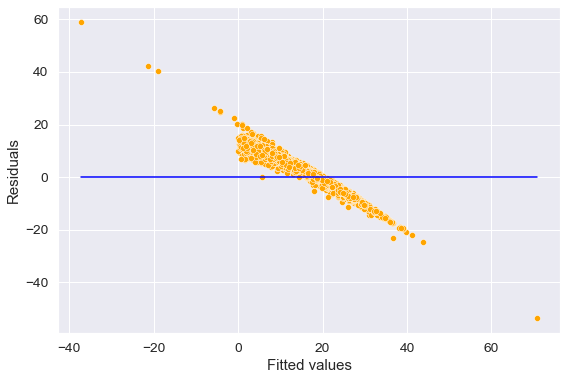

In [139]:
# log model
sns.scatterplot(x = (model_log.fittedvalues), y=(model_log.resid),color = 'orange')
sns.lineplot(x = [model_log.fittedvalues.min(),model_log.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

In [145]:
# RSE on training data
print(np.sqrt(model_log.mse_resid))
# RMSE
pred_log_gross = model_log.predict(test)
print(np.sqrt(((test.gross - np.exp(pred_log_gross))**2).mean()))

8.428178192137642
6.36326282651653e+17


In [ ]:
params_sorted = abs(model_sqrt.params).sort_values(ascending=False)

params_df = pd.DataFrame(params_sorted, columns=['coefficient'])

params_df['p_value'] = model_sqrt.pvalues

params_df.loc[params_df['p_value'] <= 0.05].head(5)